# Heart Attack Prediction Model

Health is one of the worlds biggest concerns and challenges, both public and private health systems are begining to use Machine Learning as a way to create diagnostic tools to improve the overall system.

One of the particular systems that can be of great assistance to health systems are diagnostic ones, especially those that can figure out if a person is suffering or might suffer from a particular condition. A good diagnostic system would be able to give a clean diagnosis (no disease) with a very high level of accuracy (close to 100%) so as to be able to reduce the preassure of the health systems in this area, and save the time of the health professionals for the people who are actually sick.

In Machine Learning terms, we want to have a system with a very high recall, that although it might allow some non sick people thorugh (false possitives), hopefully has a 0% rate of false negatives, hence all sick people will get treated.

You can find all of the information and documents related to this project in the github repository on this link: https://github.com/jackraiferbaruch/machine_learning_supervised_models

### Heard Attack Model

This project will attempt to use the CDC's Indicators of Heart Disease dataset from 2022 ('https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease'), to create a model using Logistic Regression and Tree Classification, that has a high recall to predict heart disease based on the available data.

### About the Dataset

The dataset is available from Kaggle on '[this link](https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease)'.

It contains 246,022 observations registered by the CDC in 2022. It also contains 40 columns, down from the original 300. I will not be going in depth on the specifics of each column, but will talk about a few of them as I go though EDA.

It is very important to consider that this dataset has already been cleaned, and contains no null values. All observations with null values have been previously removed.


### Steps to build our model

I will go through a series of steps to build our model:

1. EDA - Understanding the data, what our target will be and what are the best predictors.
2. Building an ML model - Create 2 models with few and all variables for Logistic Regression and then one model with all variables for Decision Tree Classification.
3. Evaluation the models - Using several metrics to evaluate the model, but recall will be our main focus (more on this later).
4. Conclusions and suggestions - Make our conclusions based on the results and make suggestions and recommendations for future work.

## Step 1. EDA

The fist part is importing the Pandas Library to work with a dataframe, loading the dataset and get a general sense for the data.

In [212]:
# Import the Pandas Library

import pandas as pd

In [213]:
# Load the data into a dataframe hdd (heart disease data)

hdd = pd.read_csv('heart_disease_2022.csv')

In [214]:
# Take a look at the first few rows of the dataset

hdd.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


Some initial interesting observations about this dataset:

- The state info could be interesting, but might also create issues when it comes to a generalized model.
- There are many binary columns, related to vaccinations, weather the person does phisical activity, smoking, drinking and similar ones. This should be converted into actual binary (1, 0) instead of yes or no variables. Especially true for the HadHeartAttack column which will become the target variable to predict.
- The GeneralHealth column is interesting, but we need to transform it into a numeric scale as well. Since we want to make predictions, maybe a scale that measures better health with a lower number might work better, but we need to test and find thatb out.
- The LastCheckupTime also needs to be converted to binary where 1 means they have had a checkup in the last 12 months and 0 means they have not.
- PhysicalHealthDays and MentalHealthDays is interesting, since it measures the time off people had the last 12 months regarding health issues, physical or mental. Have to explore how relevant both of these are for heart disease.

In [215]:
# Check the shape of the dataframe

hdd.shape

(246022, 40)

Here we can see that the whole set consists of 246,022 observations.

In [216]:
# Get a general description of the dataset

hdd.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000
mean,4.119026,4.167140,7.021331,1.705150,83.615179,28.668136
std,8.405844,8.102687,1.440681,0.106654,21.323156,6.513973
min,0.000000,0.000000,1.000000,0.910000,28.120000,12.020000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.270000
50%,0.000000,0.000000,7.000000,1.700000,81.650000,27.460000
75%,3.000000,4.000000,8.000000,1.780000,95.250000,31.890000
max,30.000000,30.000000,24.000000,2.410000,292.570000,97.650000


There are too many columns which are not numeric, nonetheless are binary, hence we need to change that before we go any further as to be able to run a good correlation analysis and pick out the best variables for our model.

Hence the next step is to change the Yes/No columns into binary 1/0 columns.

In [218]:
# Replace all of the values in Yes/No colums for binary 1/0 columns.

hdd.replace({'Yes':1, 'No':0}, inplace=True)

In [221]:
# Replace values in LastCheckupTime to ordinal numeric.

hdd['LastCheckupTime'].replace({'Within past year (anytime less than 12 months ago)':0,
             'Within past 2 years (1 year but less than 2 years ago)':1,
             'Within past 5 years (2 years but less than 5 years ago)':2,
             '5 or more years ago':3}, inplace=True)

In [222]:
# Replace values in GeneralHealth to ordinal numeric.

hdd['GeneralHealth'].replace({'Excellent':0,
             'Very good':1,
             'Good':2,
             'Fair':3,
             'Poor': 4}, inplace=True)

In [223]:
# Replace values in RemovedTeeth to ordinal numeric.

hdd['RemovedTeeth'].replace({'None of them':0,
             '1 to 5':1,
             '6 or more, but not all':2,
             'All':3}, inplace=True)

In [224]:
# Replace values in TetanusLast10Tdap to ordinal numeric.

hdd['TetanusLast10Tdap'].replace({'Yes, received Tdap':0,
             'Yes, received tetanus shot but not sure what type':1,
             'Yes, received tetanus shot, but not Tdap':2,
             'No, did not receive any tetanus shot in the past 10 years':3}, inplace=True)

In [225]:
# Replace values in Sex to ordinal numeric.

hdd['Sex'].replace({'Male':0,
             'Female':1}, inplace=True)

In [226]:
# Replace non numeric values in CovidPos to ordinal numeric (home testing will count as 1 as well).

def extract_numbers(s):
    numbers = s[4:6] # This is where the bottom bin number is
    return int(numbers)

hdd['AgeBinStart'] = hdd['AgeCategory'].apply(extract_numbers)

In [227]:
# For covid category, we will use the starting bin age.

hdd['CovidPos'].replace({0:0,
             1:1,
             'Tested positive using home test without a health professional':1}, inplace=True)

In [228]:
# For ECigaretteUsage we will go binary between yes and no with no other consideration, not currently will be classified as yes.

hdd['ECigaretteUsage'].replace({'Never used e-cigarettes in my entire life':0,
             'Use them some days':1,
             'Not at all (right now)':1,
             'Use them every day':1}, inplace=True)

In [229]:
# For smoker status, we will use 0 for former smoker or non smoker and 1 for current smoker.

hdd['SmokerStatus'].replace({'Former smoker':0,
             'Never smoked':0,
             'Current smoker - now smokes every day':1,
             'Current smoker - now smokes some days':1}, inplace=True)

In [232]:
# For diabetes, we will have 3 levels, 0 for non, 1 borderline and 2 for yes. Only during pregnancy will be classified as 0.

hdd['HadDiabetes'].replace({0:0,
             1:2,
             'Yes, but only during pregnancy (female)':0,
             'No, pre-diabetes or borderline diabetes':1}, inplace=True)

Finally we will remove the colums we are not using.

- State: since we are not going to worry about location at the moment, and because it might generate bias.
- Age category, since we transformed it to bottom age bin, so as to have a numeric variable.
- Race and Ethnicity, because it might introduce bias into our model.

In [234]:
hdd = hdd.drop(columns = ['State', 'AgeCategory', 'RaceEthnicityCategory'])

In [235]:
hdd.head()

,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,...,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,AgeBinStart
0,1,1,4.0,0.0,0,1,9.0,0,0,0,...,71.67,27.99,0,0,1,1,0,0,0,65
1,0,1,0.0,0.0,0,1,6.0,0,0,0,...,95.25,30.13,0,0,1,1,1,0,0,70
2,0,1,0.0,0.0,0,0,8.0,2,0,0,...,108.86,31.66,1,0,0,1,3,0,1,75
3,1,3,5.0,0.0,0,1,9.0,0,0,0,...,90.72,31.32,0,0,1,1,3,0,1,80
4,1,2,3.0,15.0,0,1,5.0,1,0,0,...,79.38,33.07,0,0,1,1,3,0,0,80


Now that we have a cleaned dataset with only numeric values, we can start looking deeper into i

In [236]:
# Check the describe function to get a feel for the dataset

hdd.describe()

,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,...,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,AgeBinStart
count,246022.00000,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000,...,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000
mean,0.51951,1.510084,4.119026,4.167140,0.339031,0.777646,7.021331,0.682606,0.054609,0.060779,...,83.615179,28.668136,0.549979,0.343473,0.533269,0.406029,1.459626,0.042988,0.319955,53.483758
std,0.49962,1.032808,8.405844,8.102687,0.775630,0.415829,1.440681,0.873861,0.227216,0.238925,...,21.323156,6.513973,0.497497,0.474869,0.498893,0.491091,1.218321,0.202831,0.466460,17.538961
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,28.120000,12.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
25%,0.00000,1.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,0.000000,0.000000,...,68.040000,24.270000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000
50%,1.00000,1.000000,0.000000,0.000000,0.000000,1.000000,7.000000,0.000000,0.000000,0.000000,...,81.650000,27.460000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,55.000000
75%,1.00000,2.000000,3.000000,4.000000,0.000000,1.000000,8.000000,1.000000,0.000000,0.000000,...,95.250000,31.890000,1.000000,1.000000,1.000000,1.000000,3.000000,0.000000,1.000000,70.000000
max,1.00000,4.000000,30.000000,30.000000,3.000000,1.000000,24.000000,3.000000,1.000000,1.000000,...,292.570000,97.650000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,80.000000


Check the correlation table to find what those are.

In [237]:
hdd.corr()

,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,...,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,AgeBinStart
Sex,1.000000,0.018106,0.044081,0.091705,-0.106042,-0.059334,0.015793,0.012033,-0.073316,-0.065590,...,-0.349416,-0.007782,-0.093824,0.013266,0.067484,0.062705,-0.023213,-0.049911,0.018875,0.054015
GeneralHealth,0.018106,1.000000,0.489091,0.268539,-0.077702,-0.278371,-0.068927,0.281152,0.185680,0.201036,...,0.184140,0.243437,-0.178229,0.042415,0.025930,0.140265,0.067694,0.006507,-0.001593,0.131197
PhysicalHealthDays,0.044081,0.489091,1.000000,0.306800,-0.063144,-0.240842,-0.056063,0.190137,0.133420,0.149130,...,0.077505,0.116905,-0.129370,0.055652,0.016741,0.101219,0.022336,0.005226,0.022498,0.089913
MentalHealthDays,0.091705,0.268539,0.306800,1.000000,0.046251,-0.110531,-0.130100,0.053906,0.025892,0.024086,...,0.042441,0.082182,-0.025991,0.124789,-0.057823,-0.025422,-0.010232,0.114210,0.045061,-0.190021
LastCheckupTime,-0.106042,-0.077702,-0.063144,0.046251,1.000000,0.024504,-0.054684,-0.065555,-0.065753,-0.080311,...,-0.009168,-0.057247,0.044513,-0.005615,-0.224618,-0.200185,0.096107,0.055302,-0.011270,-0.235361
PhysicalActivities,-0.059334,-0.278371,-0.240842,-0.110531,0.024504,1.000000,0.003188,-0.195829,-0.083187,-0.078761,...,-0.093823,-0.158922,0.157835,0.018492,0.030820,-0.051405,-0.100721,0.017668,0.019569,-0.107332
SleepHours,0.015793,-0.068927,-0.056063,-0.130100,-0.054684,0.003188,1.000000,-0.002484,0.003631,0.011537,...,-0.054691,-0.054750,-0.003540,-0.074169,0.066836,0.060531,0.004566,-0.043797,-0.045945,0.124338
RemovedTeeth,0.012033,0.281152,0.190137,0.053906,-0.065555,-0.195829,-0.002484,1.000000,0.165904,0.154966,...,0.028214,0.073271,-0.190670,-0.023298,0.024958,0.168634,0.111900,-0.043738,-0.069483,0.348687
HadHeartAttack,-0.073316,0.185680,0.133420,0.025892,-0.065753,-0.083187,0.003631,0.165904,1.000000,0.445903,...,0.038436,0.030413,-0.074181,-0.014563,0.045235,0.119955,0.026341,-0.021127,-0.024529,0.171457
HadAngina,-0.065590,0.201036,0.149130,0.024086,-0.080311,-0.078761,0.011537,0.154966,0.445903,1.000000,...,0.046085,0.040676,-0.067258,-0.024324,0.076010,0.157748,0.013478,-0.027410,-0.019887,0.197953


Since the above table is very large, we can do two things to figure out the most relevant and most irrelevant variables. Build a correlation heatmap and a correlation value list.

In [238]:
# Libraries for building a correlation heatmap

import matplotlib.pyplot as plt
import seaborn as sns

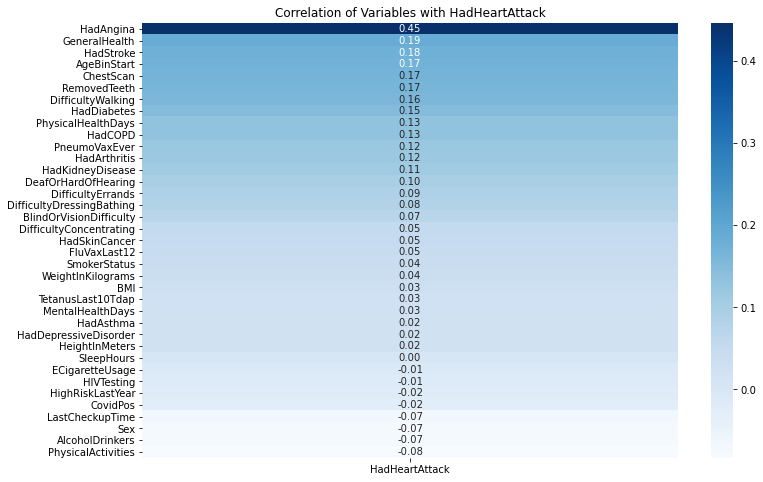

In [239]:
# Build a correlation heatmap focused on the heart attack variable

corr_to_target = hdd.corr()['HadHeartAttack'].drop('HadHeartAttack')
corr_to_target_df = pd.DataFrame(corr_to_target)
sorted_corr = corr_to_target.sort_values(ascending=False)
sorted_corr_df = pd.DataFrame(sorted_corr)

plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
sns.heatmap(sorted_corr_df, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation of Variables with HadHeartAttack')
plt.show()

Here we can start seeing a few interesting variables which are highly correlated to having had a heart attack, which will be our target variable. 

With this, we can define the variables we want to work with in every iteration of the model, to help it run as best as possible. Also it could lead to creating other models to predict other problems like stroke or kidney disease.

Important for this particular model. Since Angina is an indicator of heard disease, we will remove it from the models as it will show a high collinearity with heart attack.

## 2. Building an ML model

The choice of logistic regression for this model has to do with it's simplicity. Since the target variable, heart attack is binary, it allows us to find an interesting hyperplane division between the datapoints and give us a prediction. Then, evaluation the predictions within the testing set, we can find out how accurate, or in this case, recall, to see how well the model calculate possitive cases.

We will still measure several metrics for how well the model is performing as we add more variables to it.

### First Model - 3 Variables

Our first model will have only 3 variables. We will be looking at the highest variables from correlation (minus angina), we have General Healt, Had Strocke and Age Bin Start.

As for the model itself, we will be using SKLearn's stochastic gradient descent classifier to build a logistic regression model with more than one variable.

In [240]:
# Import needed libraries

import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, r2_score
from sklearn.metrics import confusion_matrix

In [241]:
# Build our datasets for the model

target = hdd['HadHeartAttack'] # target variable from the column 
variables_m3 = ['GeneralHealth', 'HadStroke', 'AgeBinStart'] # Vector with the 3 column variables
hddm3 = hdd[variables_m3]

In [242]:
# Now we split the data into training and testing sets with a 75/25 split

x3_train, x3_test, y3_train, y3_test = train_test_split(hddm3, target, test_size=0.25, random_state=52)

In [243]:
# Build the heart attack classifier model for 3 variables. The no penalty parameters is set
# for the classifier to work as a logistic regression problem and not an SVM
ha_clf3 = SGDClassifier(penalty = None)

In [244]:
# Train the model

ha_clf3.fit(x3_train, y3_train)

SGDClassifier(penalty=None)

In [245]:
# Model scores

y_pred3 = ha_clf3.predict(x3_test)

accuracy3 = accuracy_score(y3_test, y_pred3)
precision3 = precision_score(y3_test, y_pred3)
recall3 = recall_score(y3_test, y_pred3)
f13 = f1_score(y3_test, y_pred3)

print("Accuracy Model 3:", accuracy3)
print("Precision Model 3:", precision3)
print("Recall Model 3:", recall3)
print("F1 Score Model 3:", f13)

Accuracy Model 3: 0.9139270965434266
Precision Model 3: 0.20018709073900842
Recall Model 3: 0.1904479382972412
F1 Score Model 3: 0.19519610823958652


In [246]:
# Visualize the confusion matrix

conf_matrix3 = confusion_matrix(y3_test, y_pred3)

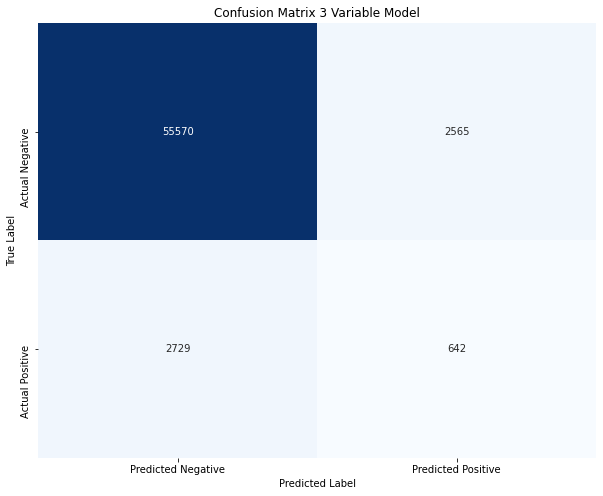

In [247]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix3, annot=True, cmap='Blues', fmt='d', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix 3 Variable Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Initially, we can see that our model, although it has a high level of accuracy, we have a lot of false negatives, which is a big problem, hence the low recall value. The next step is building a model with more variables to see if our results improve.

### Second Model - All Variables

Now we will build a model with all variables.

In [249]:
# Build our datasets for the model

target = hdd['HadHeartAttack'] # target variable from the column 
hddmAll = hdd.drop(columns = ['HadHeartAttack'])

In [250]:
# Now we split the data into training and testing sets with a 75/25 split

xAll_train, xAll_test, yAll_train, yAll_test = train_test_split(hddmAll, target, test_size=0.25, random_state=52)

In [251]:
ha_clfAll = SGDClassifier(penalty = None)

In [252]:
# Train the model

ha_clfAll.fit(xAll_train, yAll_train)

SGDClassifier(penalty=None)

In [255]:
# Model scores

y_predAll = ha_clfAll.predict(xAll_test)

accuracyAll = accuracy_score(yAll_test, y_predAll)
precisionAll = precision_score(yAll_test, y_predAll)
recallAll = recall_score(yAll_test, y_predAll)
f1All = f1_score(yAll_test, y_predAll)

print("Accuracy Model All:", accuracyAll)
print("Precision Model All:", precisionAll)
print("Recall Model All:", recallAll)
print("F1 Score Model All:", f1All)

Accuracy Model All: 0.9460215263551524
Precision Model All: 0.5852842809364549
Recall Model All: 0.051913378819341445
F1 Score Model All: 0.09536784741144415


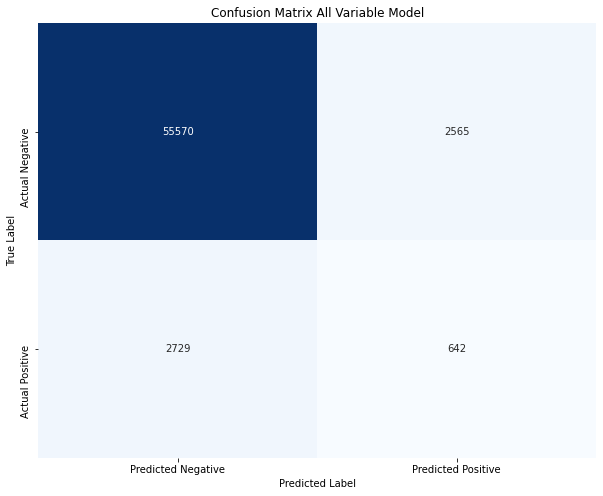

In [286]:
# Visualize the confusion matrix

conf_matrixAll = confusion_matrix(yAll_test, y_predAll)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix5, annot=True, cmap='Blues', fmt='d', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix All Variable Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [261]:
from sklearn.metrics import precision_recall_curve, auc

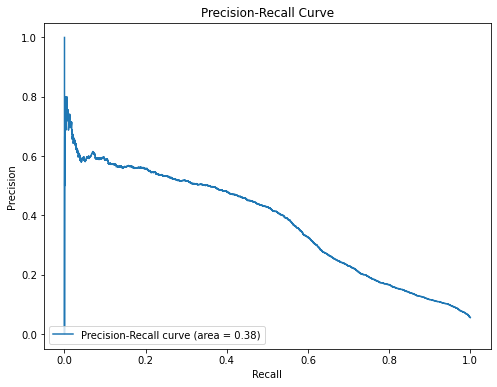

In [263]:
# Predict probabilities of positive class for the test set
y_scores = ha_clfAll.decision_function(xAll_test)

# Calculate precision and recall
precision, recall, thresholds = precision_recall_curve(yAll_test, y_scores)

# Calculate area under the curve (AUC) for precision-recall curve
auc_score = auc(recall, precision)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall curve (area = %0.2f)' % auc_score)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

## Model 3, decission tree

Since we are not getting a good enough result on our recall for our SGDClassifier (logistic regression), let's try a decission tree model and see if we can improve it.

In [264]:
# Import our Tree model function from SkLearn
from sklearn.tree import DecisionTreeClassifier

In [271]:
# Initiate our tree model

tree_model = DecisionTreeClassifier(random_state=52)

In [273]:
# Train it with the sets we already have prepared

tree_model.fit(xAll_train, yAll_train)

DecisionTreeClassifier(random_state=52)

In [274]:
tree_pred = tree_model.predict(xAll_test)

In [277]:
accuracyT = accuracy_score(yAll_test, tree_pred)
precisionT = precision_score(yAll_test, tree_pred, average='weighted')
recallT = recall_score(yAll_test, tree_pred, average='weighted')
f1T = f1_score(yAll_test, tree_pred, average='weighted')


print("Accuracy:", accuracyT)
print("Precision:", precisionT)
print("Recall:", recallT)
print("F1 Score:", f1T)

Accuracy: 0.915000162585764
Precision: 0.9204844035838297
Recall: 0.915000162585764
F1 Score: 0.9176589259395865


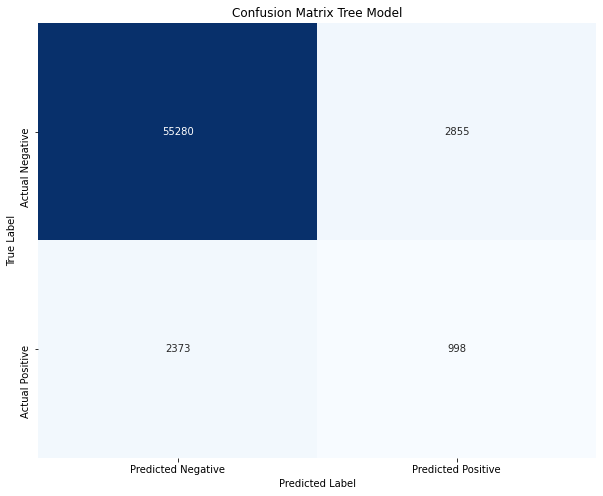

In [285]:
# Visualize the confusion matrix

conf_matrixTree = confusion_matrix(yAll_test, tree_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrixTree, annot=True, cmap='Blues', fmt='d', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix Tree Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Let's now visualize all of the models on their accuracy, precission, recall and F1 score

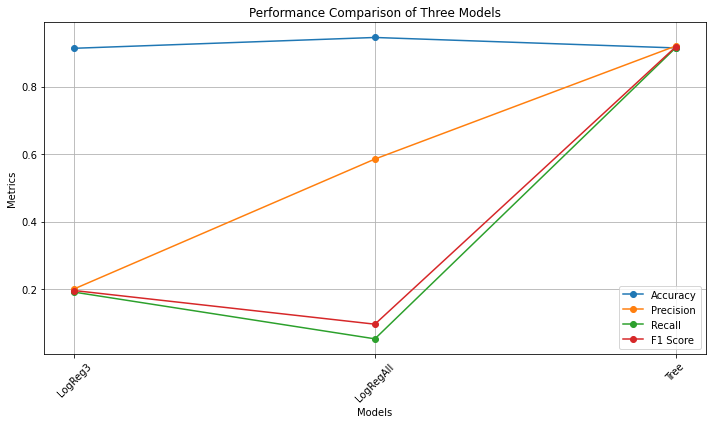

In [281]:
models = ['LogReg3', 'LogRegAll', 'Tree']
accuracy = [0.9139270965434266,0.9460215263551524,0.915000162585764]
precision = [0.20018709073900842, 0.5852842809364549, 0.9204844035838297]
recall = [0.1904479382972412, 0.051913378819341445, 0.915000162585764]
f1 = [0.19519610823958652,0.09536784741144415,0.9176589259395865]

plt.figure(figsize=(10, 6))
plt.plot(models, accuracy, marker='o', label='Accuracy')
plt.plot(models, precision, marker='o', label='Precision')
plt.plot(models, recall, marker='o', label='Recall')
plt.plot(models, f1, marker='o', label='F1 Score')

plt.legend()
plt.xlabel('Models')
plt.ylabel('Metrics')
plt.title('Performance Comparison of Three Models')
plt.grid(True)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

As we can see, although all of the models seem to have similar accuracy, recall and f1 score are abismal for the LogReg models, precision, although better for the LogReg model (all variables) it is still not good. The Tree Classifier model outperforms both LogReg models in Recall, Precision and F1 score, even if it does perform a bit worse in accuracy.

# Conclussions

Some relevant conclusions for this case.

- The health data is incredibly relevant for predicting future health outcomes, and it can be used to create models that will help save millions in healthcare.
- It is possible to create great and very accurate models, but we must be weary of accuracy as it can distract us from what is udeful.
- Improving recall in diagnostic models is vital, especially because this is an area where we absolutely have to avoid false negatives, since they can be so much more costly than false possitives.
- Finally, tree models seem to be quite a bit more suited for this kind of classification than logistic regression models. Nonetheless, it is important to keep looking at options, testing new results, and of course, applying what we learn from basic supervised models to more complex models, such as Neural Networks.

- I would suggest testing other models with the data and diving deeper into the potential of the existing data.
- The quantity of data is limited in this experiment, since more data will return a better model, it is suggested that further experiments be done with much more than a couple hunded thousand observations (several millions would be good).
- Consider other data that can help improve the recall of the model, and get rid of variables that might be belitteling the model's performance.

# Repository

You can find the complete project, including this notebook, presentation slides and video presentation link in the following github repository:
https://github.com/jackraiferbaruch/machine_learning_supervised_models.